
# Sergio Soler Rocha

# Faces dataset decompositions


This example applies to `olivetti_faces_dataset` different unsupervised
matrix decomposition (dimension reduction) methods from the module
:py:mod:`sklearn.decomposition` (see the documentation chapter
`decompositions`) .


In [2]:
print(__doc__)

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from IPython.display import Markdown

%matplotlib inline

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 4
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# #############################################################################
# Load faces data
faces = fetch_olivetti_faces(shuffle=True,
                                random_state=rng)
display(Markdown(faces.DESCR))


Automatically created module for IPython interactive environment


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes                                40
    Samples total                         400
    Dimensionality                       4096
    Features            real, between 0 and 1
    =================   =====================

The image is quantized to 256 grey levels and stored as unsigned 8-bit 
integers; the loader will convert these to floating point values on the 
interval [0, 1], which are easier to work with for many algorithms.

The "target" for this database is an integer from 0 to 39 indicating the
identity of the person pictured; however, with only 10 examples per class, this
relatively small dataset is more interesting from an unsupervised or
semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here
consists of 64x64 images.

When using these images, please give credit to AT&T Laboratories Cambridge.


In [3]:
n_samples, n_features = faces.data.shape

# global centering
faces_centered = faces.data - faces.data.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [4]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

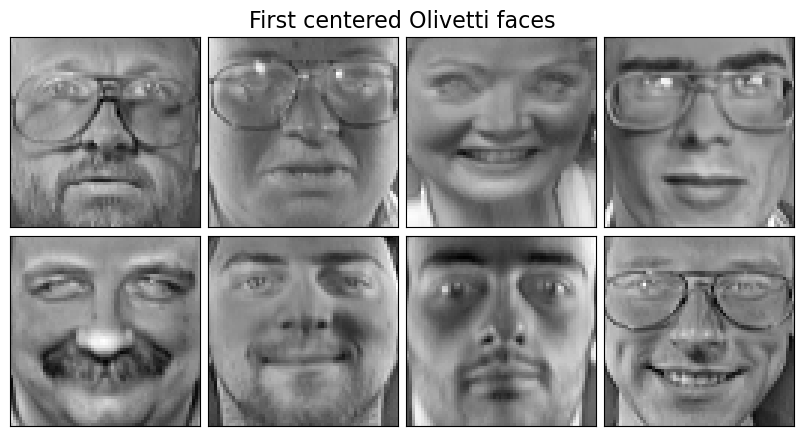

In [5]:
# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

## 2- Comprimir las imágenes aplicando PCA
- **Comprimir las imágenes aplicando PCA de manera que se preserve el 95% de la varianza y mostrar las 8 primeras imágenes originales y descomprimidas. Crear un nuevo dataset con las imágenes comprimidas. ¿Qué número de píxeles quedan al comprimir?**

El Análisis de Componentes Principales (PCA en inglés) es una técnica de reducción de dimensionalidad que se utiliza para transformar un conjunto de datos de alta dimensionalidad en un conjunto de datos de menor dimensión, manteniendo la mayor cantidad posible de la varianza original. PCA busca encontrar un conjunto de nuevas variables, llamadas componentes principales, que sean combinaciones lineales de las variables originales.

- Utilizamos la clase PCA del módulo decomposition de scikit-learn para aplicar PCA al conjunto de datos faces_centered. Seleccionamos n_components=0.95, lo que significa que se retendrá el número mínimo de componentes principales necesario para preservar el 95% de la varianza original.

- Utilizamos la función inverse_transform para reconstruir las imágenes originales a partir de los datos comprimidos obtenidos con PCA.

- Utilizamos la función plot_gallery para mostrar un conjunto de imágenes originales y sus contrapartes reconstruidas después de la aplicación de PCA.

- Calculamos el porcentaje de píxeles que permanecen después de la compresión. Esto se logra comparando el número de píxeles en las imágenes originales con el número de píxeles en las imágenes reconstruidas. faces_pca.shape[1] * n_samples representa la contribución de los componentes principales a través de las muestras, y faces_pca.shape[1] * n_features representa la contribución de los componentes principales a través de las características (píxeles). Sumando ambas contribuciones, obtenemos el total de píxeles utilizados después de la compresión.

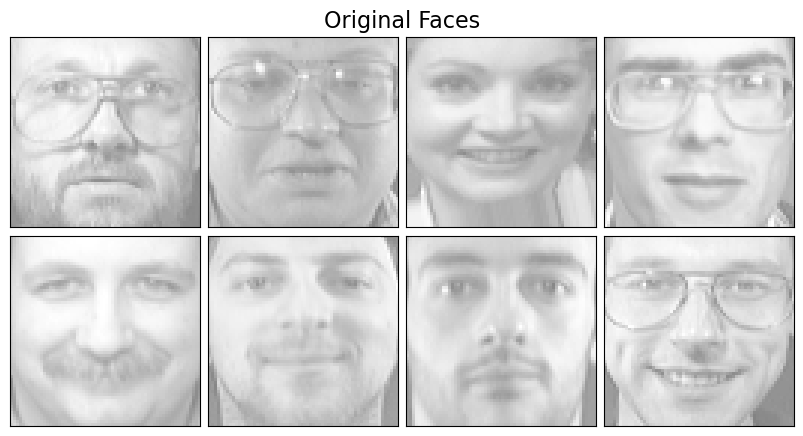

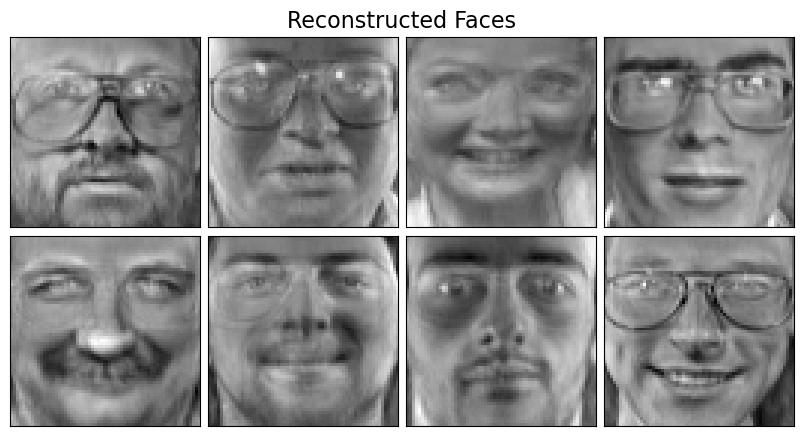

El número de píxeles resultantes después de la compresión: 39.52%


In [6]:
# Aplicamos PCA con el 95% de varianza preservada
pca = decomposition.PCA(n_components=0.95)
faces_pca = pca.fit_transform(faces_centered)

# Reconstruimos las imagenes a través de la compresión
faces_back = pca.inverse_transform(faces_pca)

# Se muestran las imagenes originales y comprimidas
plot_gallery("Original Faces", faces.data[:n_components])
plot_gallery("Reconstructed Faces", faces_back[:n_components])
plt.show()

# Calculamos el número de píxeles resultantes tras la compresión
original_pixels = n_samples * n_features
compressed_pixels = faces_pca.shape[1] * n_samples + faces_pca.shape[1] * n_features
pixels_remaining = compressed_pixels / original_pixels * 100

print(f"El número de píxeles resultantes después de la compresión: {pixels_remaining:.2f}%")


En Original Faces, podemos ver las imágenes originales; por otro lado, en Reconstructed Faces, observamos las imágenes reconstruidas después de aplicar PCA hasta preservar un 95% de la varianza original. En el conjunto de imágenes reconstruidas, a pesar de la reducción de píxeles, aún se pueden distinguir las identidades de las personas. El número de píxeles resultantes después de la compresión es del **39.52%**

## 3- Comprimir las imágenes aplicando LDA
La LDA, o Análisis Discriminante Lineal (por sus siglas en inglés, Linear Discriminant Analysis), es una técnica utilizada tanto para la clasificación como para la reducción de la dimensionalidad.

Para la reducción de la dimensionalidad LDA se centra en encontrar la combinación lineal de características que maximiza la varianza entre las clases y minimiza la varianza dentro de las clases. Específicamente, busca un subespacio de características donde las clases son bien separadas y, al mismo tiempo, la dispersión dentro de cada clase sea lo más pequeña posible. Para reducir la dimensionalidad, LDA sigue estos pasos:

- Calcula las medias de las características para cada clase: Para cada clase, calcula el vector de medias que representa el centroide de esa clase en el espacio de características original.

- Calcula las matrices de dispersión dentro de clases y entre clases. Para esto se calculan dos matrices: la matriz de dispersión dentro de las clases (dentro de-class scatter matrix) y la matriz de dispersión entre las clases (entre-class scatter matrix).

- Encuentra los autovectores y autovalores de la matriz resultante de la inversa de la matriz de dispersión dentro de clases multiplicada por la matriz de dispersión entre clases.

- Ordena los autovalores de mayor a menor y selecciona los primeros k autovectores asociados a los k autovalores más grandes, donde k es la nueva dimensionalidad deseada.

- Forma la matriz de transformación usando los autovectores seleccionados como columnas.

- Proyecta los datos originales en el nuevo espacio de características definido por la matriz de transformación.

Ahora creamos una instancia de LDA y ajustamos el modelo a los datos faces_centered con etiquetas faces.target, transformando los datos al nuevo espacio de características reducido (faces_lda). En el siguiente paso, calculamos el porcentaje de varianza explicada por cada componente, iterando y acumulando hasta alcanzar el 95%. Una vez alcanzado ese umbral, nos quedamos con el número de componentes que explican el 95% de la varianza. Luego, creamos una nueva instancia especificando el número de componentes necesarios para preservar el 95% de la varianza. Ajustamos el modelo LDA a los datos originales y transformamos los datos al nuevo espacio de características reducido. Finalmente, calculamos el porcentaje de píxeles que se preservan, siendo este del 7.96%.

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Entrenamos LDA sin especificar el número de componentes
lda = LDA()
faces_lda = lda.fit_transform(faces_centered, faces.target)

# Calculamos la cantidad de componentes necesaria para preservar el 95% de la varianza
explained_variance_ratio = lda.explained_variance_ratio_
variance_sum = 0.0
n_components_for_95_variance = 0

for i, explained_variance in enumerate(explained_variance_ratio):
    variance_sum += explained_variance
    if variance_sum >= 0.95:
        n_components_for_95_variance = i + 1
        break

# Redefinimos LDA con el número de componentes necesarios para el 95% de la varianza
lda = LDA(n_components=n_components_for_95_variance)
faces_lda = lda.fit_transform(faces_centered, faces.target)




# Calculamos el número de píxeles que quedan al comprimir
original_pixels = n_samples * n_features
compressed_pixels_lda = faces_lda.shape[1] * n_samples + faces_lda.shape[1] * n_features
pixels_remaining_lda = compressed_pixels_lda / original_pixels * 100

print(f"El número de píxeles que quedan después de la compresión con LDA: {pixels_remaining_lda:.2f}%")





El número de píxeles que quedan después de la compresión con LDA: 7.96%


Dado que la transformación en LDA no se basa en direcciones ortogonales, no existe una transformación inversa directa que pueda ser calculada de manera sencilla como en el caso de PCA. La proyección realizada por LDA está diseñada específicamente para maximizar la discriminación entre clases y, por lo tanto, la inversión de esta transformación no es una operación directa.

## 4 - Dividir los datos en conjunto de entrenamiento y test
**Dividir los datos en conjunto de entrenamiento y test de manera que el conjunto de test sea
un 20% del total, tanto para los datos originales como para los comprimidos con PCA y LDA.
Repasar la documentación de scikit-learn referida a SVM para ver si es conveniente aplicar
transformaciones a los datos.**

Ya que vamos a utilizar Support Vector Classification (SVC), vamos a normalizar los datos. Los algoritmos basados en máquinas de vectores de soporte son sensibles a la escala de las características. Si las características tienen escalas muy diferentes, algunas de ellas pueden dominar en el proceso de entrenamiento, y el modelo podría dar más peso a las características con magnitudes más grandes. La normalización ayuda a igualar la importancia relativa de todas las características.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividimos los datos en conjunto de entrenamiento y prueba (20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(faces_centered, faces.target, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Aplicamos PCA a los datos normalizados
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Aplicamos LDA a los datos normalizados
lda = LinearDiscriminantAnalysis(n_components=n_components_for_95_variance)
X_train_lda = lda.fit_transform(X_train_normalized, y_train)
X_test_lda = lda.transform(X_test_normalized)

## 5 - Afinación de hiperparámetros para LinearSVC y SVC con kernel ’rbf’ para la clasificación de los datos originales
Realizar una afinación de hiperparámetros para LinearSVC y SVC con kernel ’rbf’ para la clasificación de los datos originales, realizando la búsqueda de parámetros como se comentó en las subsecciones 7.4.1 y 7.4.2 (cambiando SVR por SVC). Medir los tiempos en milisegundos de las dos ejecuciones de GridSearchCV.

- En primer lugar definimos conjunto de hiperparámetros (param_grid_linear_svc) para el modelo LinearSVC y  (param_grid_svc) para el modelo SVC con kernel RBF. En el caso lineal se ajusta el hiperparámetro de regularización C, mientras que en el caso de SVC con kernel RBF, se ajustan los hiperparámetros C y gamma.

- Iniciamos el tiempo de ejecución para cada algoritmo (start_time_linear_svc y start_time_svc).

- Utilizamos GridSearchCV para buscar la mejor combinación de hiperparámetros. Se utiliza una validación cruzada con 5 pliegues (cv=5) y se paraleliza el proceso (n_jobs=-1). El hecho de usar 5 en lugar de 10 es debido a que una de las clases tiene menos de 10 instancias, lo cual podría ser problemático cuando usas cv=10 en la validación cruzada. 

- Ajustamos el modelo LinearSVC y SVC con kernel RBF.

- Finaliza el tiempo de ejecución (end_time_linear_svc y end_time_svc).

- Imprimimos los mejores parámetros encontrados, la mejor puntuación durante la búsqueda, la precisión en el conjunto de prueba y el tiempo total de ejecución.

In [23]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time


# LinearSVC hyperparameter tuning
param_grid_linear_svc = {'C': [0.1, 1, 10, 100, 1000]}

start_time_linear_svc = time.time()
grid_linear_svc = GridSearchCV(LinearSVC(), param_grid_linear_svc, cv=5, n_jobs=-1)
grid_linear_svc.fit(X_train_normalized, y_train)
end_time_linear_svc = time.time()

print("LinearSVC - Mejor parámetro:", grid_linear_svc.best_params_)
print("LinearSVC - Mejor puntuación:", grid_linear_svc.best_score_)
print("LinearSVC - Precisión en el Conjunto de pruebas:", accuracy_score(y_test, grid_linear_svc.best_estimator_.predict(X_test_normalized)))
print("LinearSVC - Tiempo tomado (s):", (end_time_linear_svc - start_time_linear_svc))

# SVC con RBF kernel hyperparameter tuning
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}

start_time_svc = time.time()
grid_svc = GridSearchCV(SVC(kernel='rbf'), param_grid_svc, cv=5, n_jobs=-1)
grid_svc.fit(X_train_normalized, y_train)
end_time_svc = time.time()

print("SVC with RBF Kernel - Mejores parámetros:", grid_svc.best_params_)
print("SVC with RBF Kernel - Mejor puntuación:", grid_svc.best_score_)
print("SVC with RBF Kernel - Precisión en el Conjunto de pruebas:", accuracy_score(y_test, grid_svc.best_estimator_.predict(X_test_normalized)))
print("SVC with RBF Kernel - Tiempo tomado (s):", (end_time_svc - start_time_svc))



C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC - Mejor parámetro: {'C': 0.1}
LinearSVC - Mejor puntuación: 0.95
LinearSVC - Precisión en el Conjunto de pruebas: 0.925
LinearSVC - Tiempo tomado (s): 265.57099056243896
SVC with RBF Kernel - Mejores parámetros: {'C': 10, 'gamma': 0.0001}
SVC with RBF Kernel - Mejor puntuación: 0.946875
SVC with RBF Kernel - Precisión en el Conjunto de pruebas: 0.975
SVC with RBF Kernel - Tiempo tomado (s): 3.4066107273101807


## 6-  Afinación de hiperparámetros para LinearSVC y SVC con kernel ’rbf’ mediante PCA
Utilizamos los datos comprimidos del apartado 4 X_train_pca y X_test_pca y realizamos el procedimiento del apartado 5

In [24]:
# LinearSVC hyperparameter tuning
param_grid_linear_svc = {'C': [0.1, 1, 10, 100, 1000]}

start_time_linear_svc = time.time()
grid_linear_svc = GridSearchCV(LinearSVC(), param_grid_linear_svc, cv=5, n_jobs=-1)
grid_linear_svc.fit(X_train_pca, y_train)
end_time_linear_svc = time.time()

print("LinearSVC - Mejor parámetro:", grid_linear_svc.best_params_)
print("LinearSVC - Mejor puntuación:", grid_linear_svc.best_score_)
print("LinearSVC - Precisión en el Conjunto de pruebas:", accuracy_score(y_test, grid_linear_svc.best_estimator_.predict(X_test_pca)))
print("LinearSVC - Tiempo tomado (s):", (end_time_linear_svc - start_time_linear_svc))

# SVC con RBF kernel hyperparameter tuning
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}

start_time_svc = time.time()
grid_svc = GridSearchCV(SVC(kernel='rbf'), param_grid_svc, cv=5, n_jobs=-1)
grid_svc.fit(X_train_pca, y_train)
end_time_svc = time.time()

print("SVC with RBF Kernel - Mejores parámetros:", grid_svc.best_params_)
print("SVC with RBF Kernel - Mejor puntuación:", grid_svc.best_score_)
print("SVC with RBF Kernel - Precisión en el Conjunto de pruebas:", accuracy_score(y_test, grid_svc.best_estimator_.predict(X_test_pca)))
print("SVC with RBF Kernel - Tiempo tomado (s):", (end_time_svc - start_time_svc))

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC - Mejor parámetro: {'C': 100}
LinearSVC - Mejor puntuación: 0.715625
LinearSVC - Precisión en el Conjunto de pruebas: 0.9
LinearSVC - Tiempo tomado (s): 8.80582571029663
SVC with RBF Kernel - Mejores parámetros: {'C': 10, 'gamma': 0.0001}
SVC with RBF Kernel - Mejor puntuación: 0.95625
SVC with RBF Kernel - Precisión en el Conjunto de pruebas: 0.975
SVC with RBF Kernel - Tiempo tomado (s): 0.4188096523284912


## 7-  Afinación de hiperparámetros para LinearSVC y SVC con kernel ’rbf’ mediante LDA
Utilizamos los datos comprimidos del apartado 4 X_train_lda y X_tes_lda y realizamos el procedimiento del apartado 5

In [25]:
# LinearSVC hyperparameter tuning
param_grid_linear_svc = {'C': [0.1, 1, 10, 100, 1000]}

start_time_linear_svc = time.time()
grid_linear_svc = GridSearchCV(LinearSVC(), param_grid_linear_svc, cv=5, n_jobs=-1)
grid_linear_svc.fit(X_train_lda, y_train)
end_time_linear_svc = time.time()

print("LinearSVC - Mejor parámetro:", grid_linear_svc.best_params_)
print("LinearSVC - Mejor puntuación:", grid_linear_svc.best_score_)
print("LinearSVC - Accuracy on Test Set:", accuracy_score(y_test, grid_linear_svc.best_estimator_.predict(X_test_lda)))
print("LinearSVC - Tiempo tomado (s):", (end_time_linear_svc - start_time_linear_svc))

# SVC con RBF kernel hyperparameter tuning
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}

start_time_svc = time.time()
grid_svc = GridSearchCV(SVC(kernel='rbf'), param_grid_svc, cv=5, n_jobs=-1)
grid_svc.fit(X_train_lda, y_train)
end_time_svc = time.time()

print("SVC with RBF Kernel - Mejores parámetros:", grid_svc.best_params_)
print("SVC with RBF Kernel - Mejor puntuación:", grid_svc.best_score_)
print("SVC with RBF Kernel - Precisión en el Conjunto de pruebas:", accuracy_score(y_test, grid_svc.best_estimator_.predict(X_test_lda)))
print("SVC with RBF Kernel - Tiempo tomado (s):", (end_time_svc - start_time_svc))

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC - Mejor parámetro: {'C': 0.1}
LinearSVC - Mejor puntuación: 0.996875
LinearSVC - Accuracy on Test Set: 0.95
LinearSVC - Tiempo tomado (s): 0.7081613540649414
SVC with RBF Kernel - Mejores parámetros: {'C': 1, 'gamma': 0.01}
SVC with RBF Kernel - Mejor puntuación: 1.0
SVC with RBF Kernel - Precisión en el Conjunto de pruebas: 0.9375
SVC with RBF Kernel - Tiempo tomado (s): 0.3111882209777832


## 8- Conclusiones
- 1- **Modelo LinearSVC**:

LDA proporciona la mejor puntuación y precisión en el conjunto de pruebas, con una mejora significativa en comparación con PCA. La normalización de los datos utilizando LDA resulta en un rendimiento excepcionalmente alto y eficiencia temporal.

- 2- **Modelo SVC with RBF Kernel**:

LDA ofrece un rendimiento superior en términos de puntuación y precisión en el conjunto de pruebas en comparación con el uso de datos originales o PCA. LDA supera significativamente a PCA en términos de precisión, destacando su capacidad para preservar la información discriminativa.

- 3- **Eficiencia Temporal**:

LDA demuestra ser la opción más eficiente en términos de tiempo de ejecución para ambos modelos (LinearSVC y SVC con kernel RBF).

En general, los resultados sugieren que, para este conjunto de datos específico, la normalización a través de LDA proporciona un rendimiento superior en términos de puntuación, precisión y eficiencia temporal en comparación con los datos originales y la reducción de dimensionalidad mediante PCA. Por otro lado si se busca una reducción de pixeles para la visualización de imagenes PCA es una mejor solución al disponer de una transformación inversa.